In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
root_path = "./trainingSet/trainingSet"

In [5]:
l_dir = os.listdir(root_path)
l_dir

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
X = []
y = []


In [7]:
for folder in l_dir : 
    images = os.listdir(root_path+"/"+folder)
    for img_name in images : 
         img =  cv2.imread(root_path+"/"+folder+"/"+img_name,cv2.IMREAD_GRAYSCALE)
         X.append(img)
         y.append(folder)
     

In [8]:
len(X)

42000

In [9]:
X[0]

array([[  3,   0,   0,   3,   7,   3,   0,   3,   0,  11,   0,   0,   3,
          0,   0,   3,   8,   0,   0,   3,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   5,   0,  12,   0,  16,
          0,   0,   4,   0,   2,   8,   3,   0,   4,   8,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   0,   0,   1,   2,   1,  12,   0,   8,   0,
          0,   6,   0,  11,   0,   0,   6,   7,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   3,   0,   0,   2,   3,   0,   0,   0,  12,   0,   0,
         23,   0,   0,   0,   0,  11,   3,   0,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   1,   1,   0,   0,   2,   0,   0,   6,   0,  25,  27, 136,
        135, 188,  89,  84,  25,   0,   0,   3,   1,   0,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0,   3,  88, 247, 236, 255,
        249, 250, 227, 240, 136,  37,   1,   0,   2,   2,   0,   0,   0,
          0,   0],
       [  

In [23]:
import tensorflow as tf
from tensorflow.keras import layers

In [27]:
data_augmentation = tf.keras.Sequential([
 layers.RandomRotation(1),
])


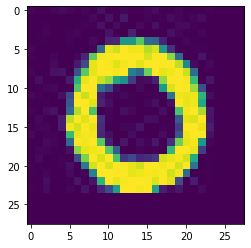

In [28]:
plt.imshow(X[0])

In [29]:
#X_rot = tf.keras.preprocessing.image.random_rotation(np.array(X), 0.2, row_axis=14,col_axis=14, channel_axis=0,fill_mode='nearest', cval=0., interpolation_order=1);

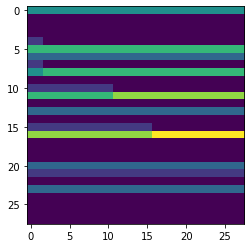

In [30]:
#plt.imshow(X_rot[0])

In [32]:
print(X[0].size)
print(X[0].ndim)
print(X[0].shape)

784
2
(28, 28)


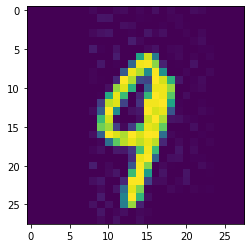

In [34]:
plt.imshow(X[40000])

In [25]:
# print(y[100])

In [35]:
from sklearn.utils import shuffle

In [36]:
X,y = shuffle(X, y, random_state = 0)

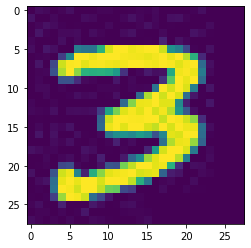

In [38]:
plt.imshow(X[5])

In [29]:
# %pip install tensorflow

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(y))
y_enc = label_encoder.transform(y)

In [40]:
from tensorflow.keras.utils import to_categorical
y_enc = to_categorical(y_enc, num_classes=len(np.unique(y_enc)))

In [42]:
y_enc[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
y[0]

'3'

In [43]:
label_encoder.inverse_transform([5])

array(['5'], dtype='<U1')

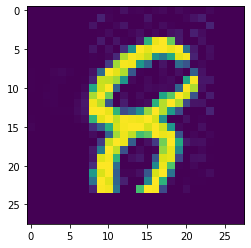

In [47]:
plt.imshow(X[20000])

In [46]:
y_enc[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test, y_train,y_test = train_test_split(X,y_enc,test_size=0.3,random_state=0)

In [54]:
len(X_train)

29400

In [50]:
X_train[0].shape

(28, 28)

In [55]:
input_size = 28*28

In [56]:
# X_train = np.reshape(X_train, [-1, input_size])
X_train = np.array(X_train).astype('float32') / 255
# X_test = np.reshape(X_test, [-1, input_size])
X_test = np.array(X_test).astype('float32') / 255

In [57]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train[0].shape

(28, 28, 1)

In [58]:
X[0].flatten().shape

(784,)

In [59]:
X_train[0].shape

(28, 28, 1)

In [60]:
import tensorflow as tf

In [61]:
batch_size = 128
hidden_units = 256
dropout = 0.70
num_labels = 10

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [63]:
model = Sequential(
    [
        Input(shape=X_train[0].shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [64]:
 %pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [66]:
#plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [65]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [68]:
model.fit(X_train, y_train,batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
230/230 [==============================] - 14s 60ms/step - loss: 0.5013 - accuracy: 0.8455 - val_loss: 0.1074 - val_accuracy: 0.9672
Epoch 2/5
230/230 [==============================] - 13s 58ms/step - loss: 0.1486 - accuracy: 0.9560 - val_loss: 0.0714 - val_accuracy: 0.9782
Epoch 3/5
230/230 [==============================] - 14s 61ms/step - loss: 0.1089 - accuracy: 0.9680 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 4/5
230/230 [==============================] - 14s 61ms/step - loss: 0.0867 - accuracy: 0.9733 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 5/5
230/230 [==============================] - 13s 58ms/step - loss: 0.0714 - accuracy: 0.9793 - val_loss: 0.0488 - val_accuracy: 0.9857


In [69]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

99/99 [==============================] - 1s 13ms/step - loss: 0.0488 - accuracy: 0.9857


In [72]:
y_pred = model.predict(X_test)

In [73]:
y_pred[0]

array([2.71454809e-07, 1.38054941e-06, 3.45369290e-06, 3.51394874e-07,
       9.98715758e-01, 1.05383066e-07, 1.75202990e-06, 9.03962336e-06,
       3.55107361e-04, 9.12812131e-04], dtype=float32)

In [74]:
y_pred = np.argmax(y_pred, axis=1)

In [75]:
y_pred[0]

4

In [76]:
y_test[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [77]:
y_test = np.argmax(y_test, axis=1)

In [78]:
y_test[0]

4

In [79]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [80]:
label_encoder.inverse_transform(y_pred) 

array(['4', '1', '2', ..., '2', '4', '0'], dtype='<U1')

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=np.unique(y)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1262
           1       1.00      0.98      0.99      1384
           2       0.98      0.99      0.98      1240
           3       0.99      0.98      0.99      1253
           4       0.98      0.99      0.99      1211
           5       0.99      0.99      0.99      1133
           6       0.99      0.99      0.99      1274
           7       0.98      0.99      0.99      1335
           8       0.97      0.99      0.98      1205
           9       0.99      0.97      0.98      1303

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [67]:
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [83]:
model.trainable=False

In [1]:
os.getcwd()

'e:\\Python\\FinalYEarProject\\PROJECT\\python'

In [84]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model ,os.getcwd() + "../src/assets/numericTrainedSet")

: 